https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

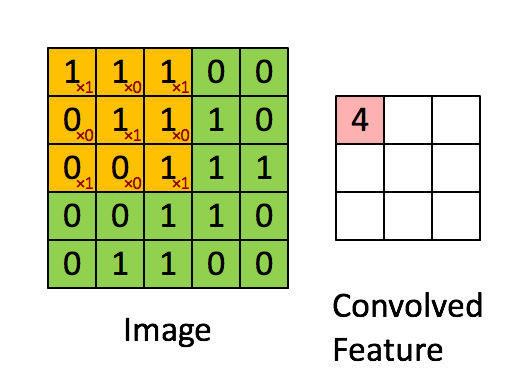

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

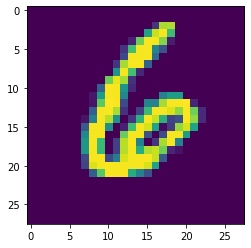

In [4]:
plt.imshow(X_train[13,:,:])
plt.show()

## Normalized the data

In [5]:
X_train = X_train / 255
y_train = y_train / 255

X_test = X_test / 255
y_test = y_test / 255

In [6]:
y_test.shape

(10000,)

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [8]:
y_train

array([[0.01960784],
       [0.        ],
       [0.01568627],
       ...,
       [0.01960784],
       [0.02352941],
       [0.03137255]])

In [9]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [10]:
model = Sequential()

model.add(Conv2D(filters = 25, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters = 16,kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [13]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [ ]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
223/240 [==========================>...] - ETA: 1s - loss: 0.0466 - accuracy: 0.0981

In [ ]:
plt.plot(history.history['loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
Y_pred = model.predict(X_test)